In [1]:
from util_comp import *
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
import time

from sklearn.model_selection import train_test_split


# Makes sure we see all columns
pd.set_option('display.max_columns', None)

# ignore warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("data/BST_V2toV9.csv", header=0, sep=";")
df = pd.DataFrame(main(one_hot=True, dataV=data, retained=True))
print(df.shape)
df.head()

Elapsed time to compute age categorisation: 0 minutes and 0 seconds
Elapsed time to compute correct systematic error: 0 minutes and 9 seconds
Elapsed time to compute load column names: 0 minutes and 0 seconds
Elapsed time to compute categorisation of outcome column: 0 minutes and 3 seconds
Elapsed time to compute change values in catagorical columns: 1 minutes and 34 seconds
Elapsed time to compute OneHotEncoding: 0 minutes and 1 seconds
Elapsed time to compute Full process: 1 minutes and 47 seconds
(37681, 430)


,"Q4- (3 to 6 years old) In each of the following age groups, how many children live totally or partially with you?","Q4- (7 to 12 years old) In each of the following age groups, how many children live totally or partially with you?","Q4- (13 to 17 years old) In each of the following age groups, how many children live totally or partially with you?","Q4- (18 years and over) In each of the following age groups, how many children live totally or partially with you?",outcome,"(Q1- Your sex?_A man,)","(Q1- Your sex?_A woman,)","(Q1- Your sex?_nan,)","(Q2- How old are you?_18 - 30,)","(Q2- How old are you?_30 - 39,)","(Q2- How old are you?_40 - 44,)","(Q2- How old are you?_45 - 49,)","(Q2- How old are you?_50 - 55,)","(Q2- How old are you?_56 - 70,)","(Q2- How old are you?_nan,)","(STATUS_AM Technicians,)","(STATUS_Employees,)","(STATUS_Frames,)","(STATUS_Workers,)","(STATUS_nan,)","(In which sector of activity do you work?_Construction,)","(In which sector of activity do you work?_Design office and engineering,)","(In which sector of activity do you work?_Human health and social action,)","(In which sector of activity do you work?_Industry,)","(In which sector of activity do you work?_Other businesses,)","(In which sector of activity do you work?_Retail business,)","(In which sector of activity do you work?_Services,)","(In which sector of activity do you work?_Transport, energy, telecommunications,)","(In which sector of activity do you work?_Wholesale trade (all businesses in 206),)","(In which sector of activity do you work?_nan,)","(What is the size of your business (in total, all locations combined)? 2009 fake_10 to 49 employees,)","(What is the size of your business (in total, all locations combined)? 2009 fake_250 to 999 employees,)","(What is the size of your business (in total, all locations combined)? 2009 fake_50 to 249 employees,)","(What is the size of your business (in total, all locations combined)? 2009 fake_Less than 10 employees,)","(What is the size of your business (in total, all locations combined)? 2009 fake_nan,)","(Q5- Apart from your children, do you have a dependent or sick family member(s) whom you take care of regularly?_No,)","(Q5- Apart from your children, do you have a dependent or sick family member(s) whom you take care of regularly?_Yes, who lives elsewhere,)","(Q5- Apart from your children, do you have a dependent or sick family member(s) whom you take care of regularly?_Yes, who lives with me,)","(Q5- Apart from your children, do you have a dependent or sick family member(s) whom you take care of regularly?_nan,)","(Would you say that over the last 12 months, your company's activity has:_Accelerated,)","(Would you say that over the last 12 months, your company's activity has:_Do not know,)","(Would you say that over the last 12 months, your company's activity has:_Slow down,)","(Would you say that over the last 12 months, your company's activity has:_Stabilized,)","(Would you say that over the last 12 months, your company's activity has:_nan,)","(Q9- Are you working?_Full time,)","(Q9- Are you working?_Part time,)","(Q9- Are you working?_nan,)","(Q10- Do you have shift work (work organized in successive teams, which take turns at the same workstations) with alternating hours?_No,)","(Q10- Do you have shift work (work organized in successive teams, which take turns at the same workstations) with alternating hours?_Yes,)","(Q10- Do you have shift work (work organized in successive teams, which take turns at the same workstations) with alternating hours?_nan,)","(Q12- Do you work most often?_At customers,)","(Q12- Do you work most often?_At home teleworking,)","(Q12- Do you work most often?_In a commercial premises or agency,)","(Q12- Do you work most often?_In a shared office (3 to 5 people),)","(Q12- Do you work most often?_In a shared work space - co-working,)","(Q12- Do you work most often?_In a vehicle,)","(Q12- Do you work most often?_In a workshop, a technical room,)","(Q12- Do you work most

In [3]:
data = df

# Split the data for training and evaluation
# X: features with the outcome column removed, where outcome is 0 or 1
# y: outcome column

# get the rows withs outcome 0 or 1
X = data[(data['outcome'] == 0) | (data['outcome'] == 1)].drop('outcome', axis=1, inplace=False)
X.columns = [str(i) for i in X.columns]
y = data[(data['outcome'] == 0) | (data['outcome'] == 1)]['outcome']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [4]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# feature selection
def select_features(X_train, y_train, X_test,score_func, k):
 fs = SelectKBest(score_func, k=k)
 fs.fit(X_train, y_train)
 X_train_fs = fs.transform(X_train)
 X_test_fs = fs.transform(X_test)
 return X_train_fs, X_test_fs, fs

### Chi Sq

Feature 0: 37.304216
Feature 1: 9.609575
Feature 2: 56.390146
Feature 3: 100.338786
Feature 4: 20.202416
Feature 5: 25.538608
Feature 6: 1.949307
Feature 7: 111.308462
Feature 8: 66.267365
Feature 9: 5.615003
Feature 10: 73.648381
Feature 11: 58.230402
Feature 12: 67.409854
Feature 13: 0.044400
Feature 14: 1.139935
Feature 15: 0.133944
Feature 16: 22.087948
Feature 17: 38.451512
Feature 18: nan
Feature 19: 0.406987
Feature 20: 21.959481
Feature 21: 3.682892
Feature 22: 0.071547
Feature 23: 5.033678
Feature 24: 9.165950
Feature 25: 2.458128
Feature 26: 0.464581
Feature 27: 18.127028
Feature 28: nan
Feature 29: 0.256690
Feature 30: 24.232202
Feature 31: 5.842533
Feature 32: 61.204258
Feature 33: 0.268348
Feature 34: 0.486014
Feature 35: 1.131551
Feature 36: 9.014910
Feature 37: 2.593681
Feature 38: 2.455229
Feature 39: 4.522018
Feature 40: 3.803984
Feature 41: 17.605139
Feature 42: 8.441646
Feature 43: 2.460109
Feature 44: 15.436807
Feature 45: 2.879989
Feature 46: 1.857699
Feature 47: 7

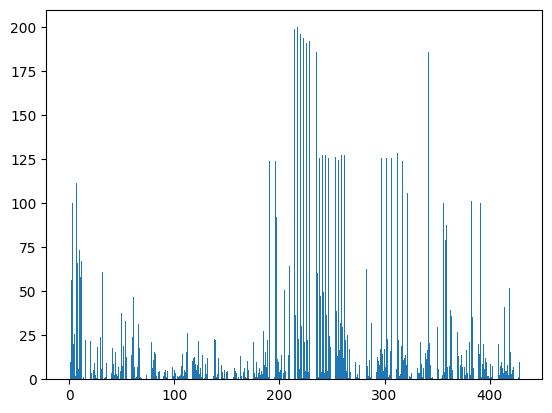

In [5]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test, chi2, 'all')
# what are scores for the features
for i in range(len(fs.scores_)):
 print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.savefig('outputs/00_feature_select_29/feat_imp_chi2.png')
plt.show()


In [6]:
# get the scores for the features and remove the nan values
scores = []
for i in range(len(fs.scores_)):
    if np.isnan(fs.scores_[i]):
        continue
    else:
        scores.append(fs.scores_[i])

# get the min and max scores
min_chi2_imp = min(scores)
max_chi2_imp = max(scores)
print(f"min: {min_chi2_imp}")
print(f"max: {max_chi2_imp}")

min: 0.0
max: 200.04235488377833


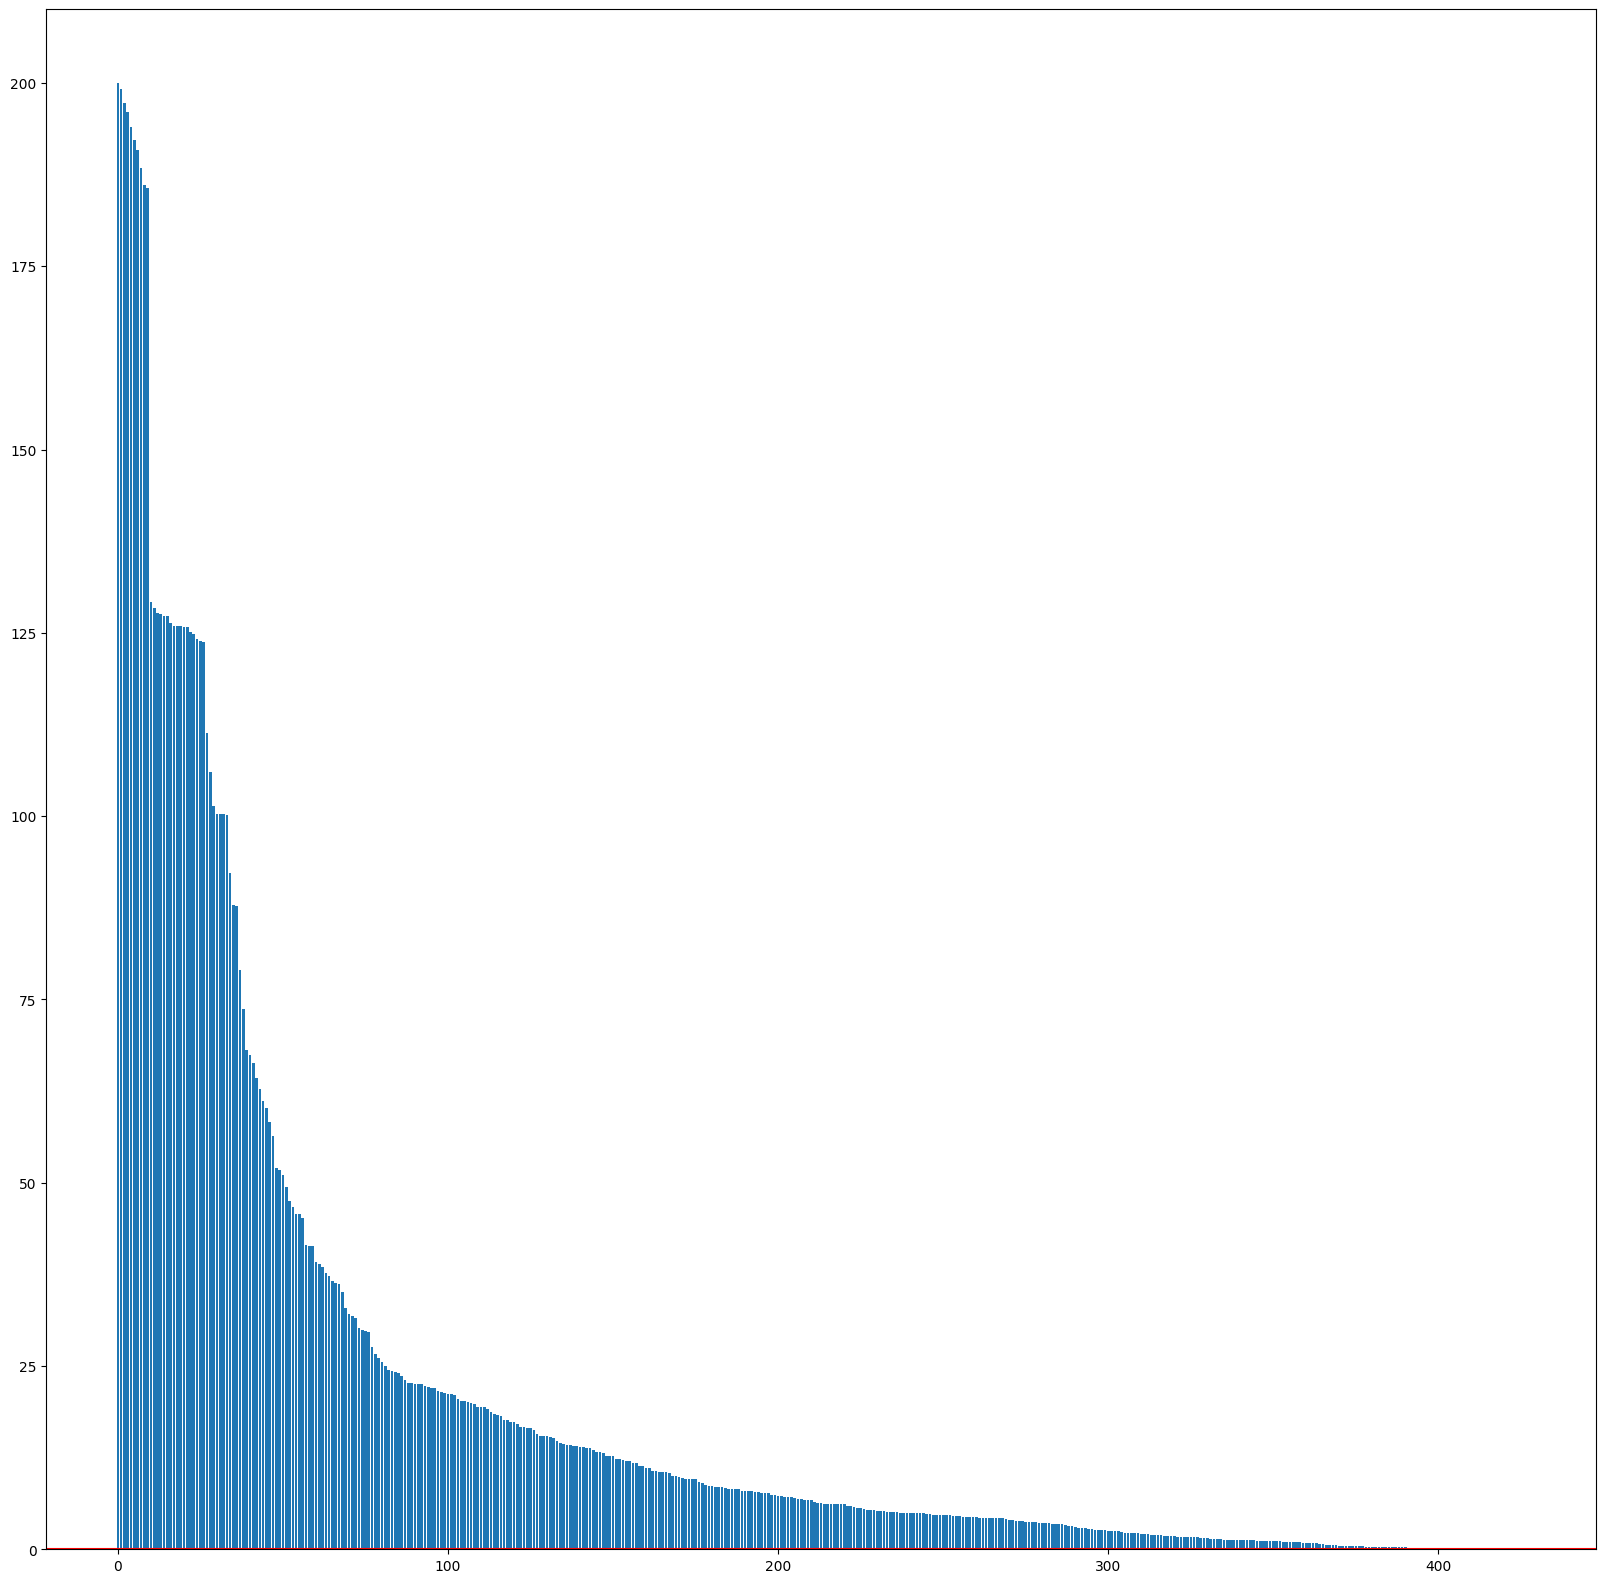

number of features with scores above the threshold_chi2: 426


In [7]:
# sort the scores in descending order
scores.sort(reverse=True)

# get the threshold_chi2

threshold_chi2 = 0
# plot the scores
# draw a vertical line at the threshold_chi2
plt.figure(figsize=(20,20))
plt.bar([i for i in range(len(scores))], scores)
plt.axhline(y=threshold_chi2, color='r', linestyle='-')
plt.savefig('outputs/00_feature_select_29/feat_imp_chi2_sorted.png')
plt.show()

# get the number of features with scores above the threshold

num_features = len([i for i in scores if i > threshold_chi2])
print(f"number of features with scores above the threshold_chi2: {num_features}")


In [8]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test, chi2, num_features)

In [9]:
models, test_accuracies = train_random_forests(X_train_fs, y_train, X_test_fs, y_test)
print(f"average test accuracy: {np.mean(test_accuracies)}")

Forest 1/1 trained with 
F1 score: 0.4682439037330047 
test accuracy: 0.8376 
train accuracy: 1.0000 
ROAUC: 0.6864088195895977 
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      4807
           1       0.92      0.01      0.03       945

    accuracy                           0.84      5752
   macro avg       0.88      0.51      0.47      5752
weighted avg       0.85      0.84      0.77      5752


Elapsed time to compute Random Forest 1/1: 0 minutes and 4 seconds
average test accuracy: 0.8376216968011126


In [10]:
# difference between the max and threshold scores
range_chi2 =  max_chi2_imp - threshold_chi2
print(f"Range: {range_chi2}")

Range: 200.04235488377833


In [11]:
accuracy_scores = []
prev_num_features = 0
for i in range(1001):
    print(f"{i}:\n")
    threshold_itr = threshold_chi2 + round((range_chi2 * i / 1000), 4)
    print(f"Threshold: {threshold_itr}")
    num_features_itr = len([sc for sc in scores if sc > threshold_itr])
    print(f"number of features with scores above the threshold: {num_features_itr}")
    if prev_num_features != num_features_itr:
        prev_num_features = num_features_itr
    else:
        continue
    if num_features_itr == 0:
        break
    X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test, chi2, num_features_itr)
    models, test_accuracies = train_random_forests(X_train_fs, y_train, X_test_fs, y_test, 2)
    accuracy_scores.append((threshold_itr,np.mean(test_accuracies),num_features_itr))

0:

Threshold: 0.0
number of features with scores above the threshold: 426
Forest 1/2 trained with 
F1 score: 0.4682439037330047 
test accuracy: 0.8376 
train accuracy: 1.0000 
ROAUC: 0.6864088195895977 
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      4807
           1       0.92      0.01      0.03       945

    accuracy                           0.84      5752
   macro avg       0.88      0.51      0.47      5752
weighted avg       0.85      0.84      0.77      5752


Elapsed time to compute Random Forest 1/2: 0 minutes and 4 seconds
Forest 2/2 trained with 
F1 score: 0.47038758219524535 
test accuracy: 0.8380 
train accuracy: 1.0000 
ROAUC: 0.6855950812472552 
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      4807
           1       0.93      0.01      0.03       945

    accuracy                           0.84      5752
   macro avg       0.89      0.51      0.47      5752

In [12]:
list_th_chi2 = [i[0] for i in accuracy_scores]
list_ac_chi2 = [i[1] for i in accuracy_scores]
list_num_feat_chi2 = [i[2] for i in accuracy_scores]

In [13]:
# the min of accuracy or number of features
min_ac_chi2 = min(list_ac_chi2)
min_num_feat_chi2 = min(list_num_feat_chi2)
min_pt = min(min_ac_chi2, min_num_feat_chi2)
# the max of accuracy or number of features
max_ac_chi2 = max(list_ac_chi2)
max_num_feat_chi2 = max(list_num_feat_chi2)
max_pt = max(max_ac_chi2, max_num_feat_chi2)

# min and max of the thresholds RECORDER not corrosponding to the min and max of the accuracy
min_th_chi2 = min(list_th_chi2)
max_th_chi2 = max(list_th_chi2)

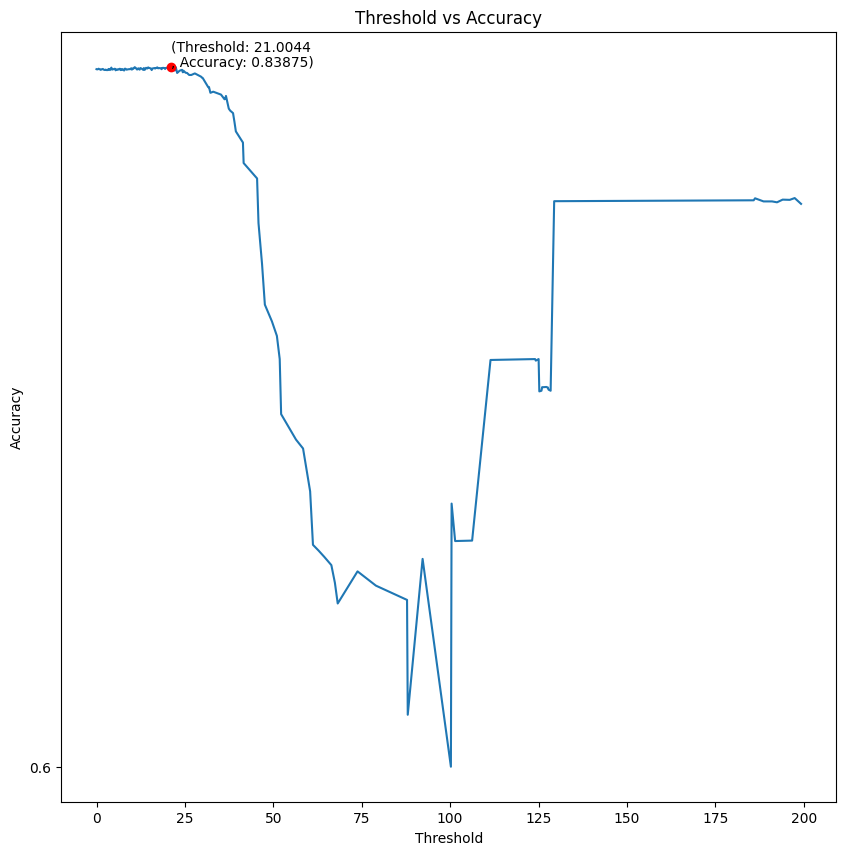

In [14]:
# plot the accuracy scores
plt.figure(figsize=(10,10))
plt.plot(list_th_chi2, list_ac_chi2)
plt.yticks(np.arange(min_pt, max_pt + (max_pt * 0.01), max_pt * 0.001))
# red dot for the highest accuracy with the corresponding threshold rounded to 5 decimal places
plt.plot(round(list_th_chi2[list_ac_chi2.index(max_ac_chi2)], 5), max_ac_chi2, 'ro')
plt.annotate(f"(Threshold: {round(list_th_chi2[list_ac_chi2.index(max_ac_chi2)], 5)}\n, Accuracy: {round(max_ac_chi2, 5)})", (round(list_th_chi2[list_ac_chi2.index(max_ac_chi2)], 5), max_ac_chi2))
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Threshold vs Accuracy')
plt.savefig('outputs/00_feature_select_29/chi2_threshold_vs_accuracy.png')
plt.show()

In [15]:
# get the threshold for the max accuracy
th_max = [i[0] for i in accuracy_scores if i[1] == max_ac_chi2][0]
print(f"Threshold for the max accuracy: {round(th_max, 5)}")

Threshold for the max accuracy: 21.0044


In [16]:
low_min = th_max - min_th_chi2
high_min = max_th_chi2 - th_max
if low_min < high_min:
    low_end = min_th_chi2
    high_end = th_max + (low_min * 2)
else:
    low_end = th_max - (high_min * 2)
    high_end = max_th_chi2

th = high_end
reduction = (high_end - low_end) / 100

accuracy_scores_limited = []
prev_num_feat = 0
while th > 0:
    print(f"Threshold: {th}")
    num_features = len([sc for sc in scores if sc > th])
    print(f"number of features with scores above the threshold: {num_features}")
    if prev_num_feat != num_features:
        prev_num_feat = num_features
    else:
        th -= reduction
        continue
    if th < low_end:
        break
    X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test, chi2, num_features)
    models, test_accuracies = train_random_forests(X_train_fs, y_train, X_test_fs, y_test, 2)
    accuracy_scores_limited.append((th,np.mean(test_accuracies),num_features))
    print(f"average test accuracy: {np.mean(test_accuracies)}")
    th -= reduction

Threshold: 63.0132
number of features with scores above the threshold: 43
Forest 1/2 trained with 
F1 score: 0.5311105812329309 
test accuracy: 0.6519 
train accuracy: 0.7274 
ROAUC: 0.5925988665119101 
              precision    recall  f1-score   support

           0       0.86      0.69      0.77      4807
           1       0.22      0.44      0.29       945

    accuracy                           0.65      5752
   macro avg       0.54      0.57      0.53      5752
weighted avg       0.76      0.65      0.69      5752


Elapsed time to compute Random Forest 1/2: 0 minutes and 1 seconds
Forest 2/2 trained with 
F1 score: 0.5294211659567926 
test accuracy: 0.6483 
train accuracy: 0.7245 
ROAUC: 0.5930752441049925 
              precision    recall  f1-score   support

           0       0.86      0.69      0.77      4807
           1       0.22      0.44      0.29       945

    accuracy                           0.65      5752
   macro avg       0.54      0.57      0.53      5752
w

In [17]:
list_th_chi2_limited = [i[0] for i in accuracy_scores_limited]
list_ac_chi2_limited = [i[1] for i in accuracy_scores_limited]
list_num_feat_chi2_limited = [i[2] for i in accuracy_scores_limited]

In [18]:
# the min of accuracy or number of features
min_ac_chi2_limited = min(list_ac_chi2_limited)
min_num_feat_chi2_limited = min(list_num_feat_chi2_limited)
min_pt_limited = min(min_ac_chi2_limited, min_num_feat_chi2_limited)
# the max of accuracy or number of features
max_ac_chi2_limited = max(list_ac_chi2_limited)
max_num_feat_chi2_limited = max(list_num_feat_chi2_limited)
max_pt_limited = max(max_ac_chi2_limited, max_num_feat_chi2_limited)

# min and max of the thresholds RECORDER not corrosponding to the min and max of the accuracy
min_th_chi2_limited = min(list_th_chi2_limited)
max_th_chi2_limited = max(list_th_chi2_limited)

In [19]:
best_th = round(list_th_chi2_limited[list_ac_chi2_limited.index(max_ac_chi2_limited)], 5)
best_nf = round(list_num_feat_chi2_limited[list_ac_chi2_limited.index(max_ac_chi2_limited)], 5)

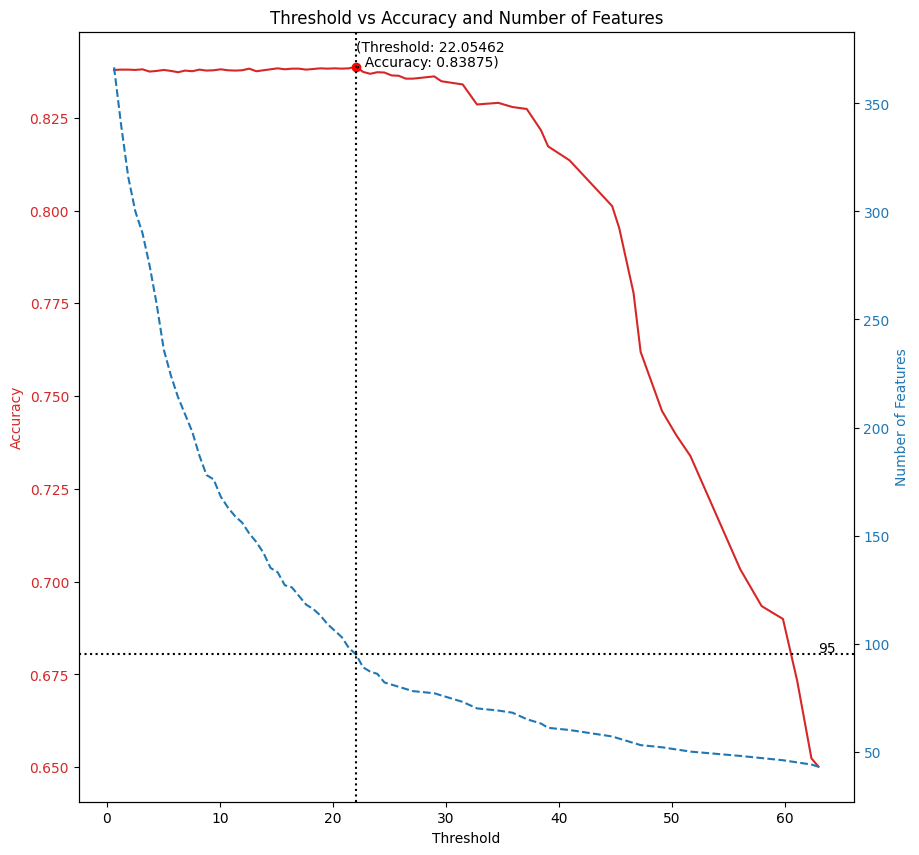

In [20]:
# plot the accuracy (left y axis) vs threshold
# plot the number of features (right y axis) vs threshold
# red dot for the highest accuracy with the corresponding threshold rounded to 5 decimal places
fig, ax1 = plt.subplots(figsize=(10,10))
color = 'tab:red'
ax1.set_xlabel('Threshold')
ax1.set_ylabel('Accuracy', color=color)
ax1.plot(list_th_chi2_limited, list_ac_chi2_limited, color=color)
ax1.tick_params(axis='y', labelcolor=color)
# ax1.yaxis.set_ticks(np.arange(min_pt_limited, max_pt_limited + (max_pt_limited * 0.01), max_pt_limited * 0.0001))
ax1.plot(round(list_th_chi2_limited[list_ac_chi2_limited.index(max_ac_chi2_limited)], 5), max_ac_chi2_limited, 'ro')
ax1.annotate(f"(Threshold: {best_th}\n, Accuracy: {round(max_ac_chi2_limited, 5)})", (round(list_th_chi2_limited[list_ac_chi2_limited.index(max_ac_chi2_limited)], 5), max_ac_chi2_limited))
# black dotted line at annotated point vertically
plt.axvline(x=best_th, color='black', linestyle='dotted')
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Number of Features', color=color)
ax2.plot(list_th_chi2_limited, list_num_feat_chi2_limited, color=color, linestyle='dashed')
# black dotted line at best_nf
plt.axhline(y=best_nf, color='black', linestyle='dotted')
ax2.annotate(f"{best_nf}", (max_th_chi2_limited, best_nf +1))
ax2.tick_params(axis='y', labelcolor=color)
# ax2.yaxis.set_ticks(np.arange(min_num_feat_chi2_limited, max_num_feat_chi2_limited + (max_num_feat_chi2_limited * 0.01), max_num_feat_chi2_limited * 0.1))
plt.title('Threshold vs Accuracy and Number of Features')
plt.savefig('outputs/00_feature_select_29/chi2_threshold_vs_accuracy_limited.png')
plt.show()

### Mutual info class

Feature 0: 0.003507
Feature 1: 0.000000
Feature 2: 0.003932
Feature 3: 0.003754
Feature 4: 0.005044
Feature 5: 0.001666
Feature 6: 0.000000
Feature 7: 0.001124
Feature 8: 0.002837
Feature 9: 0.000000
Feature 10: 0.005108
Feature 11: 0.000000
Feature 12: 0.003025
Feature 13: 0.000402
Feature 14: 0.003607
Feature 15: 0.000266
Feature 16: 0.003458
Feature 17: 0.003779
Feature 18: 0.000000
Feature 19: 0.000000
Feature 20: 0.001922
Feature 21: 0.000266
Feature 22: 0.003839
Feature 23: 0.000000
Feature 24: 0.000000
Feature 25: 0.000269
Feature 26: 0.001830
Feature 27: 0.000000
Feature 28: 0.000000
Feature 29: 0.001134
Feature 30: 0.001637
Feature 31: 0.001575
Feature 32: 0.002931
Feature 33: 0.000000
Feature 34: 0.002715
Feature 35: 0.000805
Feature 36: 0.001465
Feature 37: 0.000000
Feature 38: 0.003234
Feature 39: 0.000000
Feature 40: 0.002976
Feature 41: 0.000000
Feature 42: 0.005189
Feature 43: 0.002551
Feature 44: 0.000000
Feature 45: 0.000768
Feature 46: 0.000000
Feature 47: 0.001294
Fe

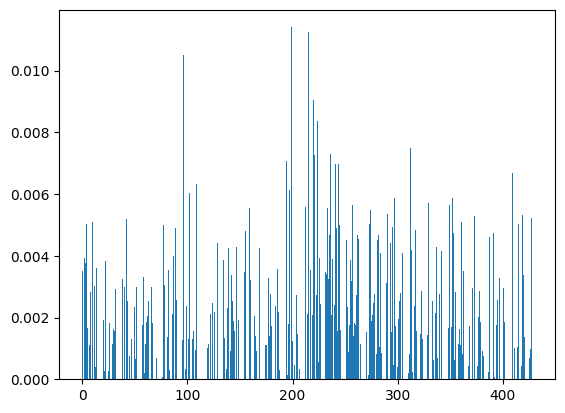

In [21]:
from sklearn.feature_selection import mutual_info_classif
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test, mutual_info_classif, 'all')
# what are scores for the features
for i in range(len(fs.scores_)):
 print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.savefig('outputs/00_feature_select_29/feat_imp_mutual_info.png')
plt.show()

In [22]:
# get the scores for the features and remove the nan values
scores = []
for i in range(len(fs.scores_)):
    if np.isnan(fs.scores_[i]):
        continue
    else:
        scores.append(fs.scores_[i])

# get the min and max scores
min_mic_imp = min(scores)
max_mic_imp = max(scores)
print(f"min: {min_mic_imp}")
print(f"max: {max_mic_imp}")

min: 0.0
max: 0.01140041760974042


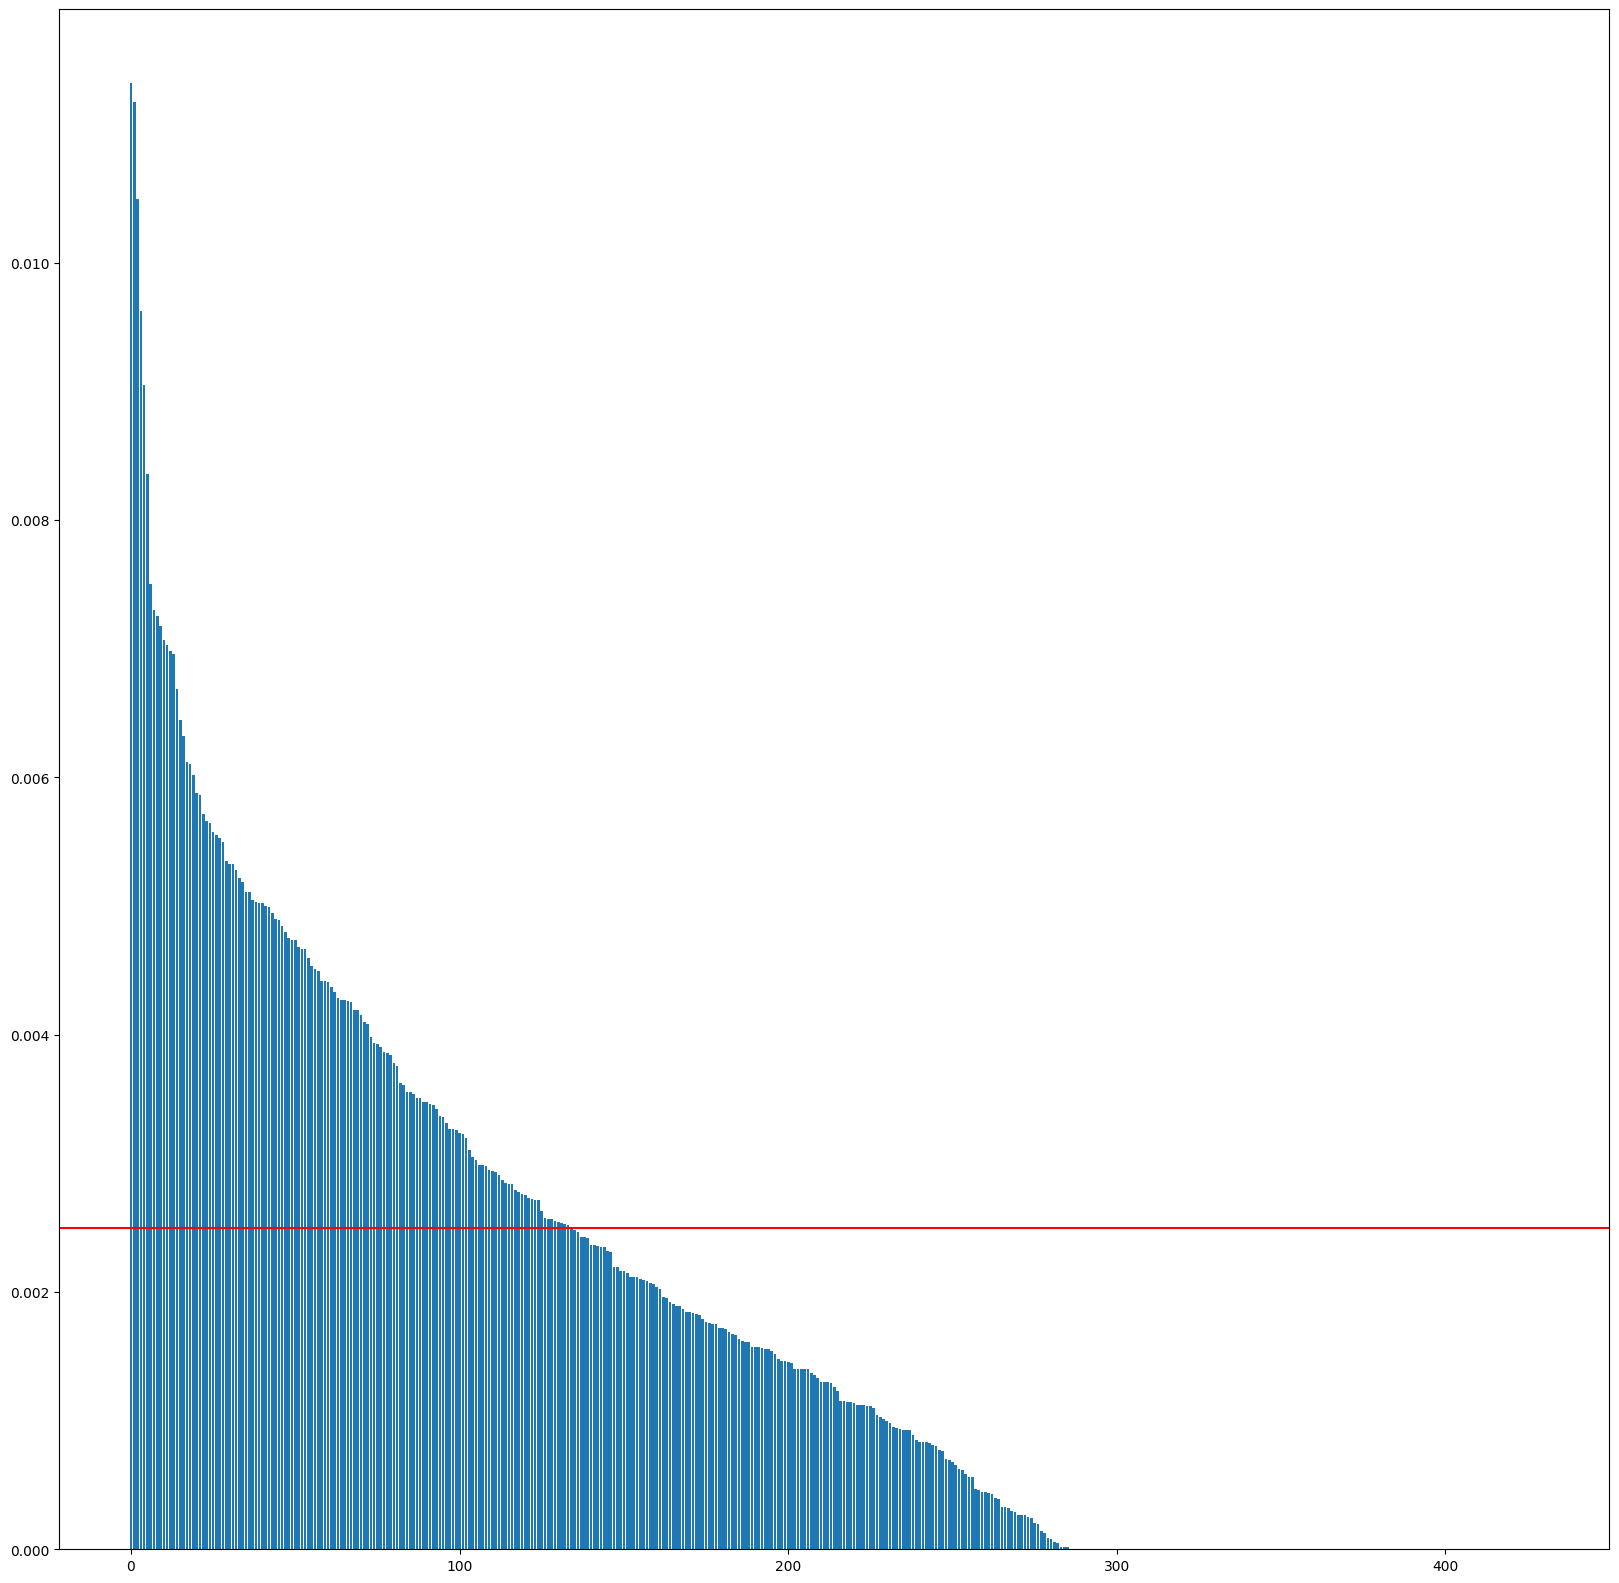

number of features with scores above the threshold_mic: 134


In [23]:
# sort the scores in descending order
scores.sort(reverse=True)

threshold_mic = 0.0025

# plot the scores
plt.figure(figsize=(20,20))
plt.bar([i for i in range(len(scores))], scores)
# draw a vertical line at the threshold_mic
plt.axhline(y=threshold_mic, color='r', linestyle='-')
plt.savefig('outputs/00_feature_select_29/feat_imp_mutual_info_sorted.png')
plt.show()

# get the number of features with scores above the threshold_mic

num_features = len([i for i in scores if i > threshold_mic])
print(f"number of features with scores above the threshold_mic: {num_features}")


In [24]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test, mutual_info_classif, num_features)

In [25]:
models, test_accuracies = train_random_forests(X_train_fs, y_train, X_test_fs, y_test)
print(f"average test accuracy: {np.mean(test_accuracies)}")

Forest 1/1 trained with 
F1 score: 0.4723849866542789 
test accuracy: 0.8380 
train accuracy: 1.0000 
ROAUC: 0.6802747976661021 
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      4807
           1       0.84      0.02      0.03       945

    accuracy                           0.84      5752
   macro avg       0.84      0.51      0.47      5752
weighted avg       0.84      0.84      0.77      5752


Elapsed time to compute Random Forest 1/1: 0 minutes and 2 seconds
average test accuracy: 0.8379694019471489


In [26]:
# difference between the max and threshold scores
range_mic =  max_mic_imp - threshold_mic
print(f"Range: {range_mic}")

Range: 0.00890041760974042


In [27]:
accuracy_scores = []
prev_num_feat = 0
for i in range(11):
    print(f"{i}:\n")
    threshold_itr = threshold_mic + round((range_mic * i / 10), 4)
    print(f"Threshold: {threshold_itr}")
    num_features_itr = len([sc for sc in scores if sc > threshold_itr])
    print(f"number of features with scores above the threshold: {num_features_itr}")
    if prev_num_feat != num_features_itr:
        prev_num_feat = num_features_itr
    else:
        continue
    if num_features_itr == 0:
        break
    X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test, mutual_info_classif, num_features_itr)
    models, test_accuracies = train_random_forests(X_train_fs, y_train, X_test_fs, y_test, 2)
    accuracy_scores.append((threshold_itr,np.mean(test_accuracies),num_features_itr))

0:

Threshold: 0.0025
number of features with scores above the threshold: 134
Forest 1/2 trained with 
F1 score: 0.4724538500360015 
test accuracy: 0.8381 
train accuracy: 1.0000 
ROAUC: 0.6686519768899631 
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      4807
           1       0.89      0.02      0.03       945

    accuracy                           0.84      5752
   macro avg       0.86      0.51      0.47      5752
weighted avg       0.85      0.84      0.77      5752


Elapsed time to compute Random Forest 1/2: 0 minutes and 2 seconds
Forest 2/2 trained with 
F1 score: 0.4723161491956597 
test accuracy: 0.8378 
train accuracy: 1.0000 
ROAUC: 0.6775232988047633 
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      4807
           1       0.80      0.02      0.03       945

    accuracy                           0.84      5752
   macro avg       0.82      0.51      0.47      57

In [28]:
list_th_mic = [i[0] for i in accuracy_scores]
list_ac_mic = [i[1] for i in accuracy_scores]
list_num_feat_mic = [i[2] for i in accuracy_scores]

In [29]:
# the min of accuracy or number of features
min_ac_mic = min(list_ac_mic)
min_num_feat_mic = min(list_num_feat_mic)
min_pt = min(min_ac_mic, min_num_feat_mic)
# the max of accuracy or number of features
max_ac_mic = max(list_ac_mic)
max_num_feat_mic = max(list_num_feat_mic)
max_pt = max(max_ac_mic, max_num_feat_mic)

# min and max of the thresholds RECORDER not corrosponding to the min and max of the accuracy
min_th_mic = min(list_th_mic)
max_th_mic = max(list_th_mic)

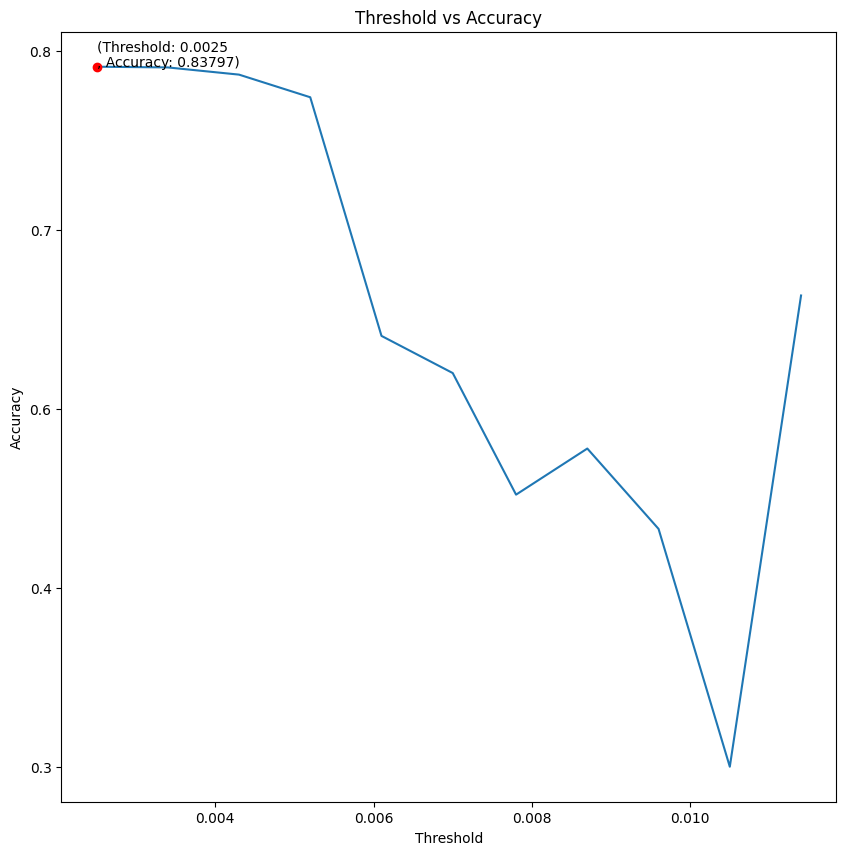

In [30]:
# plot the accuracy scores
plt.figure(figsize=(10,10))
plt.plot(list_th_mic, list_ac_mic)
plt.yticks(np.arange(min_pt, max_pt + (max_pt * 0.01), max_pt * 0.001))
# red dot for the highest accuracy with the corresponding threshold rounded to 5 decimal places
plt.plot(round(list_th_mic[list_ac_mic.index(max_ac_mic)], 5), max_ac_mic, 'ro')
plt.annotate(f"(Threshold: {round(list_th_mic[list_ac_mic.index(max_ac_mic)], 5)}\n, Accuracy: {round(max_ac_mic, 5)})", (round(list_th_mic[list_ac_mic.index(max_ac_mic)], 5), max_ac_mic))
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Threshold vs Accuracy')
plt.savefig('outputs/00_feature_select_29/mutual_info_threshold_vs_accuracy.png')
plt.show()

In [31]:
# get the threshold for the max accuracy
th_max = [i[0] for i in accuracy_scores if i[1] == max_ac_mic][0]
print(f"Threshold for the max accuracy: {round(th_max, 5)}")

Threshold for the max accuracy: 0.0025


In [35]:
low_min = th_max - min_th_mic
high_min = max_th_mic - th_max
if low_min < high_min:
    low_end = min_th_mic
    high_end = th_max + (low_min * 2)
    if low_min == 0:
        low_end = th_max
        high_end = th_max * 4
else:
    low_end = th_max - (high_min * 2)
    high_end = max_th_mic
    if high_min == 0:
        low_end = th_max / 4
        high_end = th_max

th = high_end
reduction = (high_end - low_end) / 10

accuracy_scores_limited = []
prev_num_feat = 0
while th > 0:
    print(f"Threshold: {th}")
    num_features = len([sc for sc in scores if sc > th])
    print(f"number of features with scores above the threshold: {num_features}")
    if prev_num_feat != num_features:
        prev_num_feat = num_features
    else:
        th -= reduction
        continue
    if th < low_end:
        break
    X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test, mutual_info_classif, num_features)
    models, test_accuracies = train_random_forests(X_train_fs, y_train, X_test_fs, y_test, 2)
    accuracy_scores_limited.append((th,np.mean(test_accuracies),num_features))
    print(f"average test accuracy: {np.mean(test_accuracies)}")
    th -= reduction

Threshold: 0.01
number of features with scores above the threshold: 3
Forest 1/2 trained with 
F1 score: 0.4166589836866187 
test accuracy: 0.4378 
train accuracy: 0.4430 
ROAUC: 0.5901404807583298 
              precision    recall  f1-score   support

           0       0.89      0.38      0.53      4807
           1       0.19      0.75      0.31       945

    accuracy                           0.44      5752
   macro avg       0.54      0.56      0.42      5752
weighted avg       0.77      0.44      0.49      5752


Elapsed time to compute Random Forest 1/2: 0 minutes and 0 seconds
Forest 2/2 trained with 
F1 score: 0.4166589836866187 
test accuracy: 0.4378 
train accuracy: 0.4430 
ROAUC: 0.5901404807583298 
              precision    recall  f1-score   support

           0       0.89      0.38      0.53      4807
           1       0.19      0.75      0.31       945

    accuracy                           0.44      5752
   macro avg       0.54      0.56      0.42      5752
weigh

In [36]:
list_th_mic_limited = [i[0] for i in accuracy_scores_limited]
list_ac_mic_limited = [i[1] for i in accuracy_scores_limited]
list_num_feat_mic_limited = [i[2] for i in accuracy_scores_limited]

In [37]:
# the min of accuracy or number of features
min_ac_mic_limited = min(list_ac_mic_limited)
min_num_feat_mic_limited = min(list_num_feat_mic_limited)
min_pt_limited = min(min_ac_mic_limited, min_num_feat_mic_limited)
# the max of accuracy or number of features
max_ac_mic_limited = max(list_ac_mic_limited)
max_num_feat_mic_limited = max(list_num_feat_mic_limited)
max_pt_limited = max(max_ac_mic_limited, max_num_feat_mic_limited)

# min and max of the thresholds RECORDER not corrosponding to the min and max of the accuracy
min_th_mic_limited = min(list_th_mic_limited)
max_th_mic_limited = max(list_th_mic_limited)

In [38]:
best_th = round(list_th_mic_limited[list_ac_mic_limited.index(max_ac_mic_limited)], 5)
best_nf = round(list_num_feat_mic_limited[list_ac_mic_limited.index(max_ac_mic_limited)], 5)

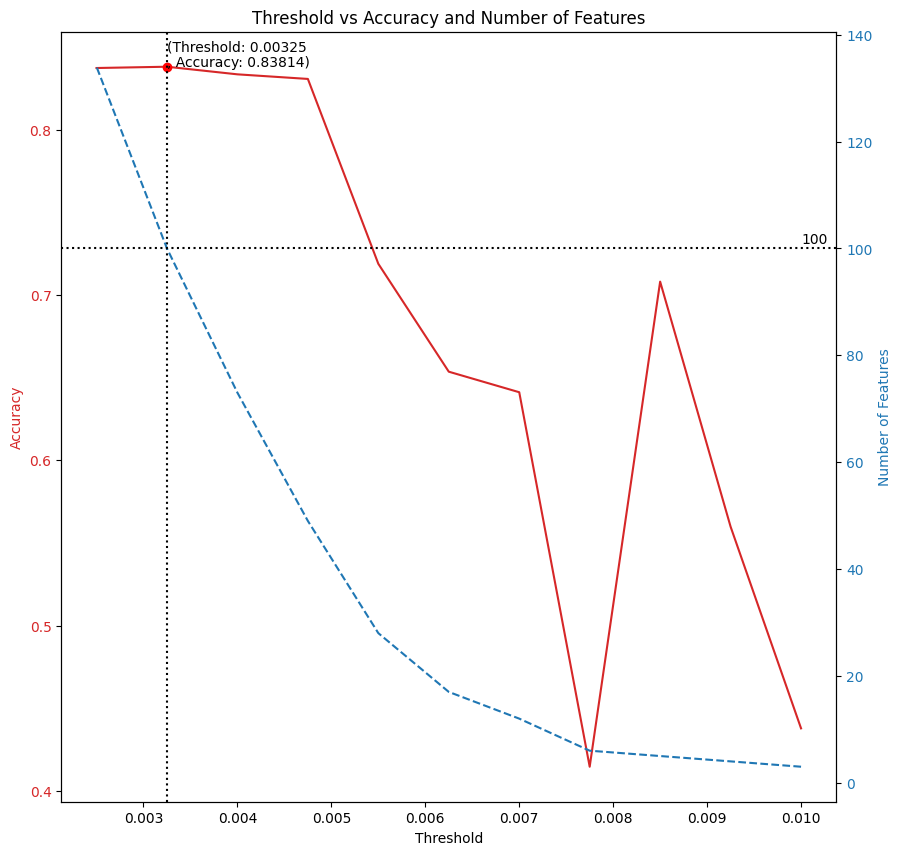

In [39]:
# plot the accuracy (left y axis) vs threshold
# plot the number of features (right y axis) vs threshold
# red dot for the highest accuracy with the corresponding threshold rounded to 5 decimal places
fig, ax1 = plt.subplots(figsize=(10,10))
color = 'tab:red'
ax1.set_xlabel('Threshold')
ax1.set_ylabel('Accuracy', color=color)
ax1.plot(list_th_mic_limited, list_ac_mic_limited, color=color)
ax1.tick_params(axis='y', labelcolor=color)
# ax1.yaxis.set_ticks(np.arange(min_pt_limited, max_pt_limited + (max_pt_limited * 0.01), max_pt_limited * 0.0001))
ax1.plot(round(list_th_mic_limited[list_ac_mic_limited.index(max_ac_mic_limited)], 5), max_ac_mic_limited, 'ro')
ax1.annotate(f"(Threshold: {best_th}\n, Accuracy: {round(max_ac_mic_limited, 5)})", (round(list_th_mic_limited[list_ac_mic_limited.index(max_ac_mic_limited)], 5), max_ac_mic_limited))
# black dotted line at annotated point vertically
plt.axvline(x=best_th, color='black', linestyle='dotted')
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Number of Features', color=color)
ax2.plot(list_th_mic_limited, list_num_feat_mic_limited, color=color, linestyle='dashed')
# black dotted line at best_nf
plt.axhline(y=best_nf, color='black', linestyle='dotted')
ax2.annotate(f"{best_nf}", (max_th_mic_limited, best_nf +1))
ax2.tick_params(axis='y', labelcolor=color)
# ax2.yaxis.set_ticks(np.arange(min_num_feat_mic_limited, max_num_feat_mic_limited + (max_num_feat_mic_limited * 0.01), max_num_feat_mic_limited * 0.1))
plt.title('Threshold vs Accuracy and Number of Features')
plt.savefig('outputs/00_feature_select_29/mutual_info_threshold_vs_accuracy_limited.png')
plt.show()

In [40]:
# print the features with scores above best threshold
print(f"Number of features: {best_nf}, Threshold: {best_th}")
for i in range(len(fs.scores_)):
    if fs.scores_[i] > best_th:
        print(f"Feature {i}: {fs.scores_[i]}, {fs.feature_names_in_[i]}")

Number of features: 100, Threshold: 0.00325
Feature 1: 0.003837009843452366, Q4- (7 to 12 years old) In each of the following age groups, how many children live totally or partially with you?
Feature 2: 0.0043994445096573465, Q4- (13 to 17 years old) In each of the following age groups, how many children live totally or partially with you?
Feature 11: 0.003986409376343536, ('Q2- How old are you?_50 - 55',)
Feature 12: 0.003835592647738695, ('Q2- How old are you?_56 - 70',)
Feature 19: 0.003275705492899794, ('In which sector of activity do you work?_Construction',)
Feature 21: 0.003714204258366216, ('In which sector of activity do you work?_Human health and social action',)
Feature 30: 0.0039447405692742965, ('What is the size of your business (in total, all locations combined)? 2009 fake_250 to 999 employees',)
Feature 34: 0.005474274949970326, ('Q5- Apart from your children, do you have a dependent or sick family member(s) whom you take care of regularly?_No',)
Feature 42: 0.005487813